In [1]:
# We'll be testing the trainer class here and fixing stuff wherever necessary

# added library folder to path for notebook
import sys  
sys.path.insert(0, './gray_lib')

In [2]:
# imported all contents
from gray_lib import *

In [3]:
# import other modules
from mnist import MNIST
import random

In [4]:
# Load data
mndata = MNIST('samples')
mndata.gz = True

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

train_images = [zeroesAnd255s(img) for img in train_images]
test_images = [zeroesAnd255s(img) for img in test_images]

In [5]:
# Define a trainer instance
trainer = Trainer(x_train=train_images,y_train=train_labels,x_test=test_images,y_test=test_labels)

In [6]:
# create a model
trainer.create_model()

In [7]:
# compile model
trainer.compile_model()

('compiling model', <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001A493692160>)
('model compiled successfully',)


In [8]:
# summarise
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train the model
trainer.train(epochs=5)

Train on 124800 samples
Epoch 1/5
124800/124800 - 21s - loss: 0.8489 - accuracy: 0.7415
Epoch 2/5
124800/124800 - 10s - loss: 0.4896 - accuracy: 0.8443
Epoch 3/5
124800/124800 - 10s - loss: 0.4064 - accuracy: 0.8679
Epoch 4/5
124800/124800 - 10s - loss: 0.3579 - accuracy: 0.8824
Epoch 5/5
124800/124800 - 10s - loss: 0.3245 - accuracy: 0.8920


In [10]:
# evaluate model's performance on passed testing data
trainer.evaluate()

(0.41478072768650376, 0.86990386)

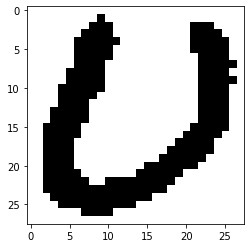

20 u


In [11]:
# select a random image to test prediction
label,character,index = showRandomImageFrom(images=trainer.test_images,labels=trainer.test_labels)

inp (1, 28, 28)


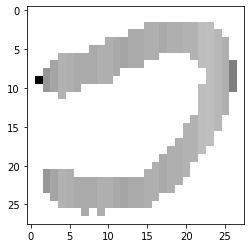

('u', 20)

In [13]:
# check prediction for above selected image
char,pred = trainer.predict_one(inp=trainer.test_images[index],get_char=True)
char,pred

In [14]:
pred,trainer.get_char_from_pred(pred)

(20, 'u')

In [15]:
# summarise model
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Creating model folder
!mkdir model
# saving trained model to 'model' folder with name 'model.h5'
trainer.save_model(path='model/model.h5')

In [18]:
# creating a new trainer instance that will be used to test the saved trainer
# only need to pass the testing data here
saved_trainer = Trainer(x_train=[],y_train=[],x_test=[],y_test=[])

In [19]:
# load the saved model in the saved_trainer instance
saved_trainer.load_model(path='model/model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 120,346
Trainable params: 120,346
Non-trainable params: 0
_________________________________________________________________


In [20]:
# evaluate model. should give same result as the evaluation of trained model
saved_trainer.evaluate(x_test=test_images,y_test=test_labels,add_to_label=-1)
# something might be wrong here

(0.41478072768650376, 0.86990386)

In [21]:
# save as tfjs model
trainer.save_model('tfjs_model',tfjs_format=True)

inp (1, 28, 28)


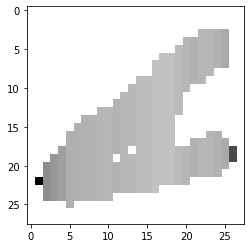

('a', 0)

In [22]:
# predict the same character in cell 10
char,pred = saved_trainer.predict_one(inp=test_images[1])
#pred,trainer.get_char_from_pred(pred)
char, int(pred)

In [10]:
import json
with open('timfile.json','w+',encoding='utf-8') as f:
    json.dump({'array':test_images[1]},fp=f)